In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
from copy import copy   
from skimage.measure import compare_ssim 
from math import floor
plt.rcParams["figure.figsize"] = [10,10]

print("Importing Dependencies and Helper Functions")

Importing Dependencies and Helper Functions


Fetching Images......
Images Obtained
Showing Images


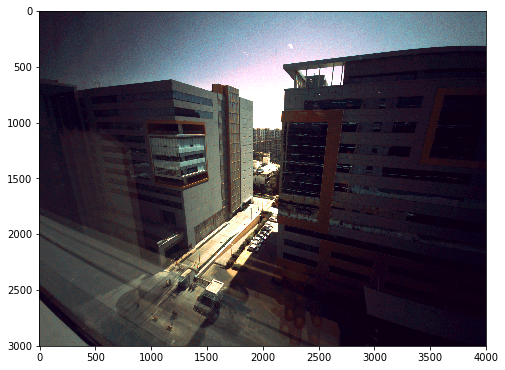

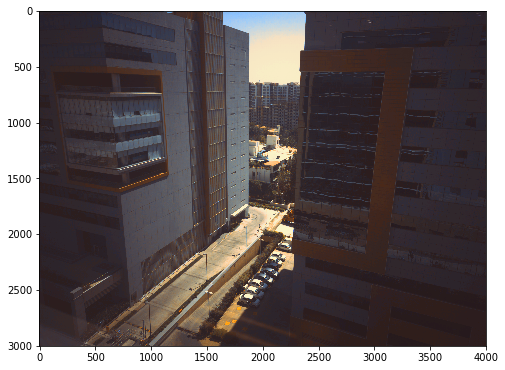

In [14]:
scene = 2
images = []                                                                    #read images
image_files = sorted(os.listdir("Dataset/scene{}/".format(scene)))
for img in image_files:
    if img.split(".")[-1].lower() not in ["jpg", "jpeg", "png", "PNG"]:
        image_files.remove(img)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =[8,8]
print ("Fetching Images",end = "")
for i in range(len(image_files)):
    print ("...",end = "")
    img = image_files[i]
    img = cv2.imread("Dataset/scene{}/{}".format(scene, img))
    bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
print()
print ("Images Obtained")

print ("Showing Images")
for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()

In [15]:
print ("Downsampling Images.....")
downsample=1
down= [i[0::downsample,0::downsample,:] for i in images]                          #downsample images
out = copy(down)
zeros = np.zeros_like(out[0])


Downsampling Images.....


In [16]:
scale = 0.54   #Set scale
print ("Creating Mask.....")

out[-1] = cv2.resize(out[-1],(int(zeros.shape[1]*scale),int(zeros.shape[0]*scale)))

h,w,c = zeros.shape
h_,w_,c_ = out[-1].shape
zeros[(h - h_)//2: (h + h_)//2,(w - w_)//2: (w + w_)//2,: ] = out[-1]
out[-1] = zeros

from copy import copy
im = copy(out[0])

obj= copy(out[-1])

src_mask = np.zeros(obj.shape, obj.dtype)

mask = (obj[:,:,:] != np.array([0,0,0]))
src_mask[mask] = 255
gray = cv2.cvtColor(src_mask, cv2.COLOR_RGB2GRAY)
gray[gray> 0] = 255
final_mask = np.stack([gray,gray,gray], axis = -1)
plt.imsave("results_demo/mask.png",final_mask)
center = (1992,1524)
print ("Done......")
print ("Computing Area Under Mask.......")

#<img src="solver-gif.gif" width="500" align="center">

Creating Mask.....
Done......
Computing Area Under Mask.......


In [17]:
normal_clone = cv2.seamlessClone(obj, im, final_mask, center, cv2.NORMAL_CLONE)   #clone
# plt.imshow(cv2.cvtColor(normal_clone, cv2.COLOR_RGB2BGR))
plt.imsave("results_demo/results.png", cv2.cvtColor(normal_clone, cv2.COLOR_RGB2BGR))
plt.show()
print ("Results saved at results_demo/results.png")

Results saved at results_demo/results.png


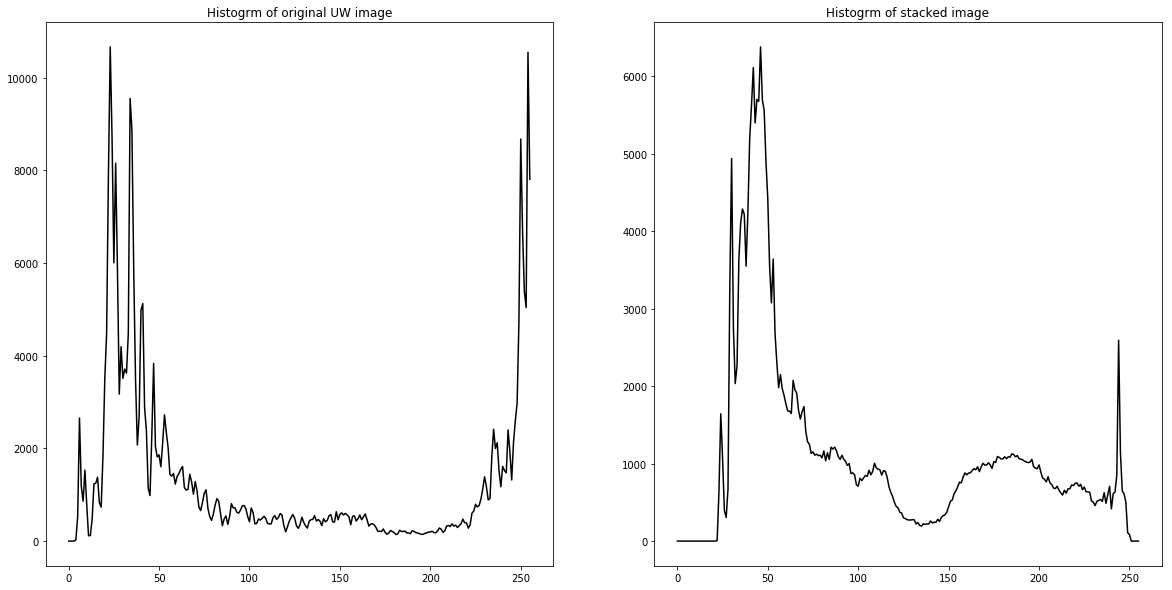

In [18]:
def computeHist(path):
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    plt.plot(histogram, color='k')
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
computeHist("results/for_hist_uw.png")
plt.title("Histogrm of original UW image")
plt.subplot(1,2,2)
plt.title("Histogrm of stacked image")
computeHist("results/for_hist.png")

plt.show()

In [ ]:
# out =[]    

# img = [images[i] for i in range(len(images))]

# out.append(img[0])     #Initialize stack with UW image

# orb = cv2.ORB_create(1000)    #Create ORB instance



In [ ]:


# print ("Computing Features and Encoding keypoints.....")

# for i in range(1,len(img)):
#     kp1, des1 = orb.detectAndCompute(img[i],None)
#     kp0, des0 = orb.detectAndCompute(out[i-1], None)
#     bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#     matches = bf.match(des1,des0)
#     matches = sorted(matches, key = lambda x:x.distance)
#     matches = matches
#     match_figure = cv2.drawMatches(img[i],kp1,out[i-1],kp0,matches,None, flags=2)
    
#     image_i_points = np.zeros((len(matches), 2), dtype=np.float32)
#     image_0_points = np.zeros((len(matches),2), dtype=np.float32)
    
#     for j,match in enumerate(matches):
#         image_i_points[j] = kp1[match.queryIdx].pt
#         image_0_points[j] = kp0[match.trainIdx].pt
    
    
#     h, mask = cv2.findHomography(image_i_points, image_0_points, cv2.RANSAC, ransacReprojThreshold = 3)
    
#     height, width, channels = out[i-1].shape
#     imgReg = cv2.warpPerspective(img[i], h, (width, height)) 
   
#     plt.figure(figsize=[10,10])
#     plt.imshow(match_figure)
# #     plt.imsave("demo results/match_figure_{}.png".format(i), match_figure)
#     plt.show()
#     print ("Warping Image....")
# #     figure = plt.figure(figsize=[10,10])
#     plt.imshow(imgReg, cmap= "gray")
    
# #     plt.title("Registered image {}".format(i))
# #     plt.imsave("demo results/registered image {}.png".format(i), imgReg)
#     plt.show()
#     out.append(imgReg)
    
    